In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


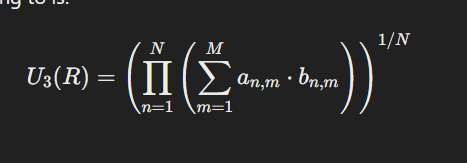

# MPF for 10*10

Subset 1: Logistic Regression MPF = 0.0
Subset 1: Decision Tree MPF = 0.0
Subset 1: Random Forest MPF = 0.0
Subset 1: kNN MPF = 29975.76784734154
Subset 2: Logistic Regression MPF = 40970.9499346076
Subset 2: Decision Tree MPF = 40970.9499346076
Subset 2: Random Forest MPF = 40970.9499346076
Subset 2: kNN MPF = 15594.554820985384
Subset 3: Logistic Regression MPF = 19260.498179293845
Subset 3: Decision Tree MPF = 19260.498179293845
Subset 3: Random Forest MPF = 19260.498179293845
Subset 3: kNN MPF = 19260.498179293845
Subset 4: Logistic Regression MPF = 15783.013425005465
Subset 4: Decision Tree MPF = 15783.013425005465
Subset 4: Random Forest MPF = 15783.013425005465
Subset 4: kNN MPF = 0.0
Subset 5: Logistic Regression MPF = 36123.45077775669
Subset 5: Decision Tree MPF = 36123.45077775669
Subset 5: Random Forest MPF = 36123.45077775669
Subset 5: kNN MPF = 12755.186869568774
Subset 6: Logistic Regression MPF = 0.0
Subset 6: Decision Tree MPF = 0.0
Subset 6: Random Forest MPF = 0.0
Su

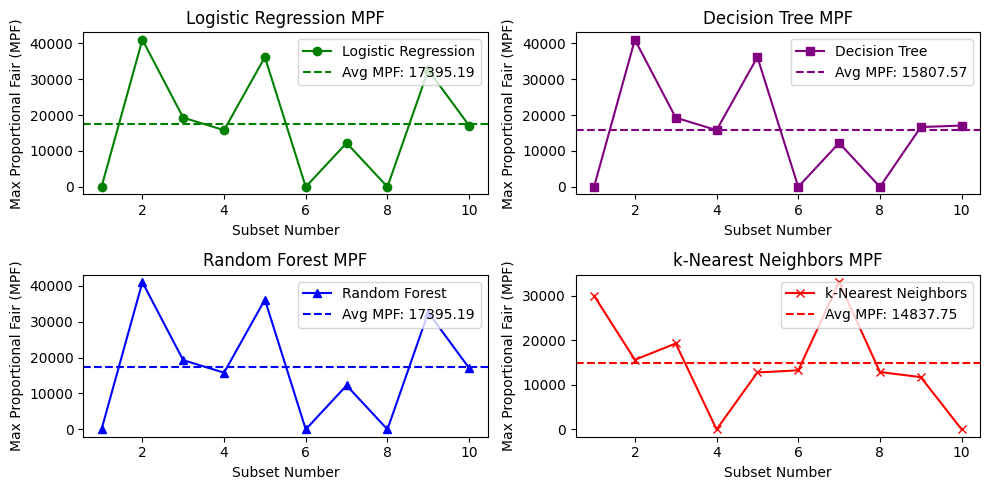

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10  # 10x10 subset size
num_subsets = 10  # Number of subsets to sample

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize lists to store MPF values for each model
logistic_mpf_values = []
decision_tree_mpf_values = []
random_forest_mpf_values = []
knn_mpf_values = []

# Define the MPF calculation function
def calculate_mpf(C, R):
    # Number of users (N) and channels (M)
    N = C.shape[0]
    M = C.shape[1]

    # Initialize the product for the MPF calculation
    product_sum = 1.0

    # Loop over all users (rows)
    for n in range(N):
        user_sum = 0.0
        # Loop over all channels (columns)
        for m in range(M):
            user_sum += C[n, m] * R[n, m]  # a_{n,m} * b_{n,m}
        product_sum *= user_sum  # Multiply the summation of each user

    # Take the N-th root of the product to calculate MPF
    mpf = product_sum ** (1 / N)
    return mpf

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for model training
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_logistic = log_reg.predict(X).reshape(subset_size, subset_size)
    logistic_predicted_reward_matrix = np.where(y_pred_logistic == 1, R, 0)
    logistic_mpf = calculate_mpf(logistic_predicted_reward_matrix, R)

    # Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X).reshape(subset_size, subset_size)
    tree_predicted_reward_matrix = np.where(y_pred_tree == 1, R, 0)
    tree_mpf = calculate_mpf(tree_predicted_reward_matrix, R)

    # Random Forest model
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X).reshape(subset_size, subset_size)
    rf_predicted_reward_matrix = np.where(y_pred_rf == 1, R, 0)
    rf_mpf = calculate_mpf(rf_predicted_reward_matrix, R)

    # k-Nearest Neighbors model
    knn_clf = KNeighborsClassifier(n_neighbors=3)  # Example k=3
    knn_clf.fit(X_train, y_train)
    y_pred_knn = knn_clf.predict(X).reshape(subset_size, subset_size)
    knn_predicted_reward_matrix = np.where(y_pred_knn == 1, R, 0)
    knn_mpf = calculate_mpf(knn_predicted_reward_matrix, R)

    # Store the MPF values for all models
    logistic_mpf_values.append(logistic_mpf)
    decision_tree_mpf_values.append(tree_mpf)
    random_forest_mpf_values.append(rf_mpf)
    knn_mpf_values.append(knn_mpf)

    # Print the MPF for this subset for each model
    print(f"Subset {i+1}: Logistic Regression MPF = {logistic_mpf}")
    print(f"Subset {i+1}: Decision Tree MPF = {tree_mpf}")
    print(f"Subset {i+1}: Random Forest MPF = {rf_mpf}")
    print(f"Subset {i+1}: kNN MPF = {knn_mpf}")

# Calculate the average MPF across all subsets for each model
avg_logistic_mpf = np.mean(logistic_mpf_values)
avg_tree_mpf = np.mean(decision_tree_mpf_values)
avg_rf_mpf = np.mean(random_forest_mpf_values)
avg_knn_mpf = np.mean(knn_mpf_values)

# Print the average MPF for each model
print("\nAverage MPF across all subsets:")
print(f"Logistic Regression MPF: {avg_logistic_mpf}")
print(f"Decision Tree MPF: {avg_tree_mpf}")
print(f"Random Forest MPF: {avg_rf_mpf}")
print(f"k-Nearest Neighbors MPF: {avg_knn_mpf}")

# Plotting the MPF for each model separately
plt.figure(figsize=(10, 5))

# Logistic Regression MPF
plt.subplot(2, 2, 1)  # 2x2 grid, first plot
plt.plot(range(1, num_subsets + 1), logistic_mpf_values, marker='o', color='green', label="Logistic Regression")
plt.axhline(y=avg_logistic_mpf, color="green", linestyle="--", label=f"Avg MPF: {avg_logistic_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Logistic Regression MPF")
plt.legend()

# Decision Tree MPF
plt.subplot(2, 2, 2)  # 2x2 grid, second plot
plt.plot(range(1, num_subsets + 1), decision_tree_mpf_values, marker='s', color='purple', label="Decision Tree")
plt.axhline(y=avg_tree_mpf, color="purple", linestyle="--", label=f"Avg MPF: {avg_tree_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Decision Tree MPF")
plt.legend()

# Random Forest MPF
plt.subplot(2, 2, 3)  # 2x2 grid, third plot
plt.plot(range(1, num_subsets + 1), random_forest_mpf_values, marker='^', color='blue', label="Random Forest")
plt.axhline(y=avg_rf_mpf, color="blue", linestyle="--", label=f"Avg MPF: {avg_rf_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Random Forest MPF")
plt.legend()

# k-Nearest Neighbors MPF
plt.subplot(2, 2, 4)  # 2x2 grid, fourth plot
plt.plot(range(1, num_subsets + 1), knn_mpf_values, marker='x', color='red', label="k-Nearest Neighbors")
plt.axhline(y=avg_knn_mpf, color="red", linestyle="--", label=f"Avg MPF: {avg_knn_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("k-Nearest Neighbors MPF")
plt.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# MPF 15*15

Subset 1: Logistic Regression MPF = 23074.925479609017
Subset 1: Decision Tree MPF = 23074.925479609017
Subset 1: Random Forest MPF = 23074.925479609017
Subset 1: kNN MPF = 23074.925479609017
Subset 2: Logistic Regression MPF = 54091.47514098254
Subset 2: Decision Tree MPF = 54091.47514098254
Subset 2: Random Forest MPF = 54091.47514098254
Subset 2: kNN MPF = 29464.888214759718
Subset 3: Logistic Regression MPF = 54348.93921200041
Subset 3: Decision Tree MPF = 54348.93921200041
Subset 3: Random Forest MPF = 54348.93921200041
Subset 3: kNN MPF = 54348.93921200041
Subset 4: Logistic Regression MPF = 23771.952349297935
Subset 4: Decision Tree MPF = 23771.952349297935
Subset 4: Random Forest MPF = 23771.952349297935
Subset 4: kNN MPF = 20587.276914033922
Subset 5: Logistic Regression MPF = 49477.64181253663
Subset 5: Decision Tree MPF = 49477.64181253663
Subset 5: Random Forest MPF = 49477.64181253663
Subset 5: kNN MPF = 49477.64181253663
Subset 6: Logistic Regression MPF = 24475.627525723

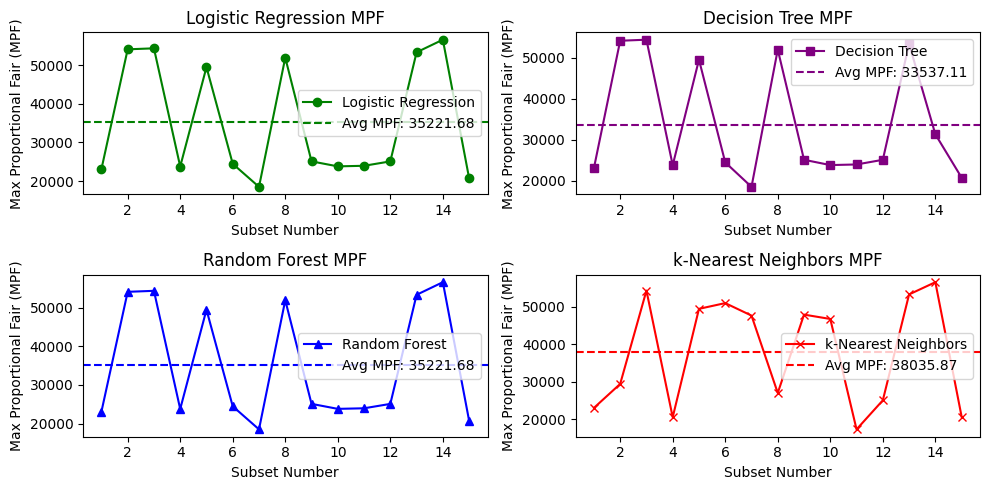

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 15  # 15x15 subset size
num_subsets = 15  # Number of subsets to sample

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize lists to store MPF values for each model
logistic_mpf_values = []
decision_tree_mpf_values = []
random_forest_mpf_values = []
knn_mpf_values = []

# Define the MPF calculation function
def calculate_mpf(C, R):
    # Number of users (N) and channels (M)
    N = C.shape[0]
    M = C.shape[1]

    # Initialize the product for the MPF calculation
    product_sum = 1.0

    # Loop over all users (rows)
    for n in range(N):
        user_sum = 0.0
        # Loop over all channels (columns)
        for m in range(M):
            user_sum += C[n, m] * R[n, m]  # a_{n,m} * b_{n,m}
        product_sum *= user_sum  # Multiply the summation of each user

    # Take the N-th root of the product to calculate MPF
    mpf = product_sum ** (1 / N)
    return mpf

# Loop to sample and evaluate 15 random 15x15 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 15x15 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 15x15 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for model training
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_logistic = log_reg.predict(X).reshape(subset_size, subset_size)
    logistic_predicted_reward_matrix = np.where(y_pred_logistic == 1, R, 0)
    logistic_mpf = calculate_mpf(logistic_predicted_reward_matrix, R)

    # Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X).reshape(subset_size, subset_size)
    tree_predicted_reward_matrix = np.where(y_pred_tree == 1, R, 0)
    tree_mpf = calculate_mpf(tree_predicted_reward_matrix, R)

    # Random Forest model
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X).reshape(subset_size, subset_size)
    rf_predicted_reward_matrix = np.where(y_pred_rf == 1, R, 0)
    rf_mpf = calculate_mpf(rf_predicted_reward_matrix, R)

    # k-Nearest Neighbors model
    knn_clf = KNeighborsClassifier(n_neighbors=3)  # Example k=3
    knn_clf.fit(X_train, y_train)
    y_pred_knn = knn_clf.predict(X).reshape(subset_size, subset_size)
    knn_predicted_reward_matrix = np.where(y_pred_knn == 1, R, 0)
    knn_mpf = calculate_mpf(knn_predicted_reward_matrix, R)

    # Store the MPF values for all models
    logistic_mpf_values.append(logistic_mpf)
    decision_tree_mpf_values.append(tree_mpf)
    random_forest_mpf_values.append(rf_mpf)
    knn_mpf_values.append(knn_mpf)

    # Print the MPF for this subset for each model
    print(f"Subset {i+1}: Logistic Regression MPF = {logistic_mpf}")
    print(f"Subset {i+1}: Decision Tree MPF = {tree_mpf}")
    print(f"Subset {i+1}: Random Forest MPF = {rf_mpf}")
    print(f"Subset {i+1}: kNN MPF = {knn_mpf}")

# Calculate the average MPF across all subsets for each model
avg_logistic_mpf = np.mean(logistic_mpf_values)
avg_tree_mpf = np.mean(decision_tree_mpf_values)
avg_rf_mpf = np.mean(random_forest_mpf_values)
avg_knn_mpf = np.mean(knn_mpf_values)

# Print the average MPF for each model
print("\nAverage MPF across all subsets:")
print(f"Logistic Regression MPF: {avg_logistic_mpf}")
print(f"Decision Tree MPF: {avg_tree_mpf}")
print(f"Random Forest MPF: {avg_rf_mpf}")
print(f"k-Nearest Neighbors MPF: {avg_knn_mpf}")

# Plotting the MPF for each model separately
plt.figure(figsize=(10, 5))

# Logistic Regression MPF
plt.subplot(2, 2, 1)  # 2x2 grid, first plot
plt.plot(range(1, num_subsets + 1), logistic_mpf_values, marker='o', color='green', label="Logistic Regression")
plt.axhline(y=avg_logistic_mpf, color="green", linestyle="--", label=f"Avg MPF: {avg_logistic_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Logistic Regression MPF")
plt.legend()

# Decision Tree MPF
plt.subplot(2, 2, 2)  # 2x2 grid, second plot
plt.plot(range(1, num_subsets + 1), decision_tree_mpf_values, marker='s', color='purple', label="Decision Tree")
plt.axhline(y=avg_tree_mpf, color="purple", linestyle="--", label=f"Avg MPF: {avg_tree_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Decision Tree MPF")
plt.legend()

# Random Forest MPF
plt.subplot(2, 2, 3)  # 2x2 grid, third plot
plt.plot(range(1, num_subsets + 1), random_forest_mpf_values, marker='^', color='blue', label="Random Forest")
plt.axhline(y=avg_rf_mpf, color="blue", linestyle="--", label=f"Avg MPF: {avg_rf_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Random Forest MPF")
plt.legend()

# k-Nearest Neighbors MPF
plt.subplot(2, 2, 4)  # 2x2 grid, fourth plot
plt.plot(range(1, num_subsets + 1), knn_mpf_values, marker='x', color='red', label="k-Nearest Neighbors")
plt.axhline(y=avg_knn_mpf, color="red", linestyle="--", label=f"Avg MPF: {avg_knn_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("k-Nearest Neighbors MPF")
plt.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# MPF 20*20

Subset 1: Logistic Regression MPF = 69904.67109674076
Subset 1: Decision Tree MPF = 69904.67109674076
Subset 1: Random Forest MPF = 69904.67109674076
Subset 1: kNN MPF = 37675.2485821557
Subset 2: Logistic Regression MPF = 32054.58001530372
Subset 2: Decision Tree MPF = 32054.58001530372
Subset 2: Random Forest MPF = 32054.58001530372
Subset 2: kNN MPF = 32329.262569764822
Subset 3: Logistic Regression MPF = 0.0
Subset 3: Decision Tree MPF = 0.0
Subset 3: Random Forest MPF = 0.0
Subset 3: kNN MPF = 29676.47537135642
Subset 4: Logistic Regression MPF = 33415.36733844695
Subset 4: Decision Tree MPF = 33415.36733844695
Subset 4: Random Forest MPF = 33415.36733844695
Subset 4: kNN MPF = 28346.884754427672
Subset 5: Logistic Regression MPF = 65767.56857042354
Subset 5: Decision Tree MPF = 65767.56857042354
Subset 5: Random Forest MPF = 65767.56857042354
Subset 5: kNN MPF = 33263.01031139802
Subset 6: Logistic Regression MPF = 34444.24554312749
Subset 6: Decision Tree MPF = 34444.24554312749

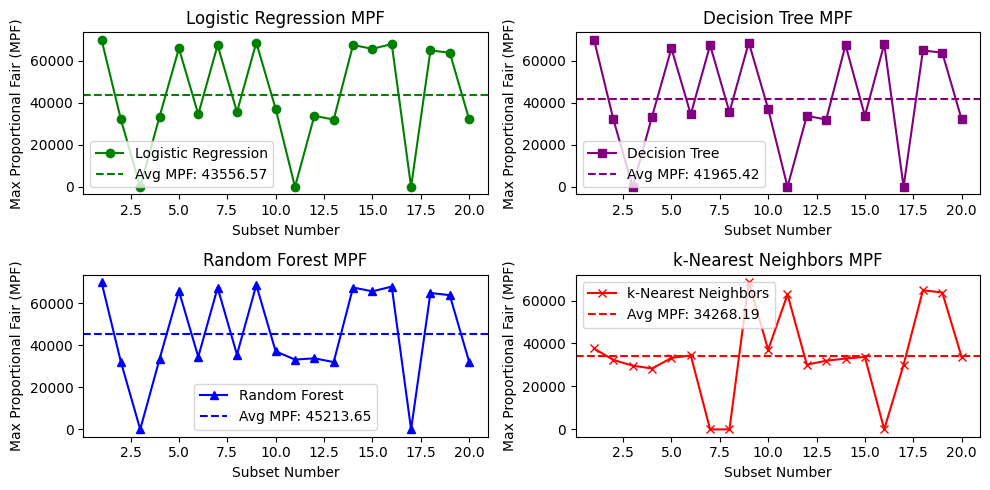

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 20  # 20x20 subset size
num_subsets = 20  # Number of subsets to sample

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize lists to store MPF values for each model
logistic_mpf_values = []
decision_tree_mpf_values = []
random_forest_mpf_values = []
knn_mpf_values = []

# Define the MPF calculation function
def calculate_mpf(C, R):
    # Number of users (N) and channels (M)
    N = C.shape[0]
    M = C.shape[1]

    # Initialize the product for the MPF calculation
    product_sum = 1.0

    # Loop over all users (rows)
    for n in range(N):
        user_sum = 0.0
        # Loop over all channels (columns)
        for m in range(M):
            user_sum += C[n, m] * R[n, m]  # a_{n,m} * b_{n,m}
        product_sum *= user_sum  # Multiply the summation of each user

    # Take the N-th root of the product to calculate MPF
    mpf = product_sum ** (1 / N)
    return mpf

# Loop to sample and evaluate 20 random 20x20 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 20x20 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 20x20 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for model training
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_logistic = log_reg.predict(X).reshape(subset_size, subset_size)
    logistic_predicted_reward_matrix = np.where(y_pred_logistic == 1, R, 0)
    logistic_mpf = calculate_mpf(logistic_predicted_reward_matrix, R)

    # Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X).reshape(subset_size, subset_size)
    tree_predicted_reward_matrix = np.where(y_pred_tree == 1, R, 0)
    tree_mpf = calculate_mpf(tree_predicted_reward_matrix, R)

    # Random Forest model
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X).reshape(subset_size, subset_size)
    rf_predicted_reward_matrix = np.where(y_pred_rf == 1, R, 0)
    rf_mpf = calculate_mpf(rf_predicted_reward_matrix, R)

    # k-Nearest Neighbors model
    knn_clf = KNeighborsClassifier(n_neighbors=3)  # Example k=3
    knn_clf.fit(X_train, y_train)
    y_pred_knn = knn_clf.predict(X).reshape(subset_size, subset_size)
    knn_predicted_reward_matrix = np.where(y_pred_knn == 1, R, 0)
    knn_mpf = calculate_mpf(knn_predicted_reward_matrix, R)

    # Store the MPF values for all models
    logistic_mpf_values.append(logistic_mpf)
    decision_tree_mpf_values.append(tree_mpf)
    random_forest_mpf_values.append(rf_mpf)
    knn_mpf_values.append(knn_mpf)

    # Print the MPF for this subset for each model
    print(f"Subset {i+1}: Logistic Regression MPF = {logistic_mpf}")
    print(f"Subset {i+1}: Decision Tree MPF = {tree_mpf}")
    print(f"Subset {i+1}: Random Forest MPF = {rf_mpf}")
    print(f"Subset {i+1}: kNN MPF = {knn_mpf}")

# Calculate the average MPF across all subsets for each model
avg_logistic_mpf = np.mean(logistic_mpf_values)
avg_tree_mpf = np.mean(decision_tree_mpf_values)
avg_rf_mpf = np.mean(random_forest_mpf_values)
avg_knn_mpf = np.mean(knn_mpf_values)

# Print the average MPF for each model
print("\nAverage MPF across all subsets:")
print(f"Logistic Regression MPF: {avg_logistic_mpf}")
print(f"Decision Tree MPF: {avg_tree_mpf}")
print(f"Random Forest MPF: {avg_rf_mpf}")
print(f"k-Nearest Neighbors MPF: {avg_knn_mpf}")

# Plotting the MPF for each model separately
plt.figure(figsize=(10, 5))

# Logistic Regression MPF
plt.subplot(2, 2, 1)  # 2x2 grid, first plot
plt.plot(range(1, num_subsets + 1), logistic_mpf_values, marker='o', color='green', label="Logistic Regression")
plt.axhline(y=avg_logistic_mpf, color="green", linestyle="--", label=f"Avg MPF: {avg_logistic_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Logistic Regression MPF")
plt.legend()

# Decision Tree MPF
plt.subplot(2, 2, 2)  # 2x2 grid, second plot
plt.plot(range(1, num_subsets + 1), decision_tree_mpf_values, marker='s', color='purple', label="Decision Tree")
plt.axhline(y=avg_tree_mpf, color="purple", linestyle="--", label=f"Avg MPF: {avg_tree_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Decision Tree MPF")
plt.legend()

# Random Forest MPF
plt.subplot(2, 2, 3)  # 2x2 grid, third plot
plt.plot(range(1, num_subsets + 1), random_forest_mpf_values, marker='^', color='blue', label="Random Forest")
plt.axhline(y=avg_rf_mpf, color="blue", linestyle="--", label=f"Avg MPF: {avg_rf_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("Random Forest MPF")
plt.legend()

# k-Nearest Neighbors MPF
plt.subplot(2, 2, 4)  # 2x2 grid, fourth plot
plt.plot(range(1, num_subsets + 1), knn_mpf_values, marker='x', color='red', label="k-Nearest Neighbors")
plt.axhline(y=avg_knn_mpf, color="red", linestyle="--", label=f"Avg MPF: {avg_knn_mpf:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Proportional Fair (MPF)")
plt.title("k-Nearest Neighbors MPF")
plt.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
